# 电影智能推荐系统
利用基于物品的智能推荐系统，从用户对观看过的电影给出的评分中有效地挖掘数据，根据用户的偏好个性化地推荐更多类似的电影。基于皮尔逊相关系数搭建一个电影智能推荐系统。

## 一、数据读取与处理
### 1、读取数据

In [2]:
import pandas as pd
df_movies = pd.read_excel('datasets/电影.xlsx') # 读取电影数据
df_score = pd.read_excel('datasets/评分.xlsx') # 读取电影评分
df_movies.head()

,电影编号,名称,类别
0,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想
1,2,勇敢者的游戏（1995）,冒险|儿童|幻想
2,3,斗气老顽童2（1995）,喜剧|爱情
3,4,待到梦醒时分（1995）,喜剧|剧情|爱情
4,5,新娘之父2（1995）,喜剧


In [3]:
df_score.head()

,用户编号,电影编号,评分
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [4]:
# 按照“电影编号”将它们合并为一张表
df = pd.merge(df_movies, df_score, on='电影编号')
df.head()

,电影编号,名称,类别,用户编号,评分
0,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,1,4.0
1,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,5,4.0
2,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,7,4.5
3,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,15,2.5
4,1,玩具总动员（1995）,冒险|动画|儿童|喜剧|幻想,17,4.5


In [7]:
# 将上述数据导出为一个新的excel数据表
df.to_excel('datasets/电影推荐系统数据.xlsx')

<AxesSubplot:>

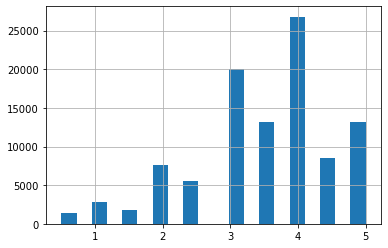

In [9]:
# 数据可视化
import matplotlib.pyplot as plt
df['评分'].hist(bins=20)  # 用hist（）函数绘制直方图，y轴为各评分出现的次数

### 2、数据分析

In [14]:
# 用pandas库的groupby()函数对合并原始数据得到的DataFrame按“名称”归类，再用mean()函数计算每部电影的评分均值，将得到的新DataFrame赋给变量ratings
ratings = pd.DataFrame(df.groupby('名称')['评分'].mean()) 
# 用sort_values()函数将评分均值从高到低排序（设置ascending参数为False，即降序排序）
ratings.sort_values('评分', ascending=False).head()

,评分
名称,
假小子（1997）,5.0
福尔摩斯和华生医生历险记：讹诈之王（1980）,5.0
机器人（2016）,5.0
奥斯卡（1967）,5.0
人类状况III（1961）,5.0


这5部电影的评分均值为5分，这可能是因为评分次数较少且普遍评分较高的缘故。

In [15]:
# 用pandas库中的groupby()函数对数据按“名称”归类，再用count()函数统计每部电影的评分次数，然后为每部电影新增一列“评分次数”
ratings['评分次数'] = df.groupby('名称')['评分'].count()
ratings.sort_values('评分次数', ascending=False).head()

,评分,评分次数
名称,,
阿甘正传（1994）,4.164134,329
肖申克的救赎（1994）,4.429022,317
低俗小说（1994）,4.197068,307
沉默的羔羊（1991）,4.161290,279
黑客帝国（1999）,4.192446,278


### 3、数据处理
将原始数据转换为数据透视表。数据透视表是一种交互式表格，我们可以动态调整表格的版面布局，以便通过不同方式分析数据，如求和、计数等。

In [17]:
user_movie = df.pivot_table(index='用户编号', columns='名称', values='评分')
user_movie.head()

名称,007之黄金眼（1995）,100个女孩（2000）,100条街道（2016）,101忠狗续集:伦敦大冒险（2003）,101忠狗（1961）,101雷克雅未克（2000）,102只斑点狗（2000）,10件或更少（2006）,10（1979）,11:14（2003）,...,龙珠：神秘冒险（1988）,龙珠：血红宝石的诅咒（1986）,龙珠：魔鬼城堡中的睡公主（1987）,龙种子（1944）,龙纹身的女孩（2011）,龙舌兰日出（1988）,龙虾（2015）,龙：夜之怒的礼物（2011）,龙：李小龙的故事（1993）,龟日记（1985）
用户编号,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


用pandas库中的pivot_table()函数基于变量df创建数据透视表，并赋给变量user_movie。其中设置pivot_table()函数的index参数为“用户编号”，即以用户编号作为数据透视表的索引；设置columns参数为“名称”，即以电影名称作为数据透视表的列；设置values参数为“评分”，即以电影评分作为数据透视表中显示的数据。

In [18]:
# 用describe()函数查看该数据透视表的描述性统计信息
user_movie.describe()

名称,007之黄金眼（1995）,100个女孩（2000）,100条街道（2016）,101忠狗续集:伦敦大冒险（2003）,101忠狗（1961）,101雷克雅未克（2000）,102只斑点狗（2000）,10件或更少（2006）,10（1979）,11:14（2003）,...,龙珠：神秘冒险（1988）,龙珠：血红宝石的诅咒（1986）,龙珠：魔鬼城堡中的睡公主（1987）,龙种子（1944）,龙纹身的女孩（2011）,龙舌兰日出（1988）,龙虾（2015）,龙：夜之怒的礼物（2011）,龙：李小龙的故事（1993）,龟日记（1985）
count,132.000000,4.00,1.0,1.0,44.000000,1.0,9.000000,3.000000,4.000000,4.00,...,1.0,1.0,2.000000,1.0,42.000000,13.000000,7.000000,1.0,8.00000,2.0
mean,3.496212,3.25,2.5,2.5,3.431818,3.5,2.777778,2.666667,3.375000,3.75,...,3.5,3.5,3.250000,3.5,3.488095,3.038462,4.000000,5.0,2.81250,4.0
std,0.859381,0.50,NaN,NaN,0.751672,NaN,0.833333,1.040833,1.030776,0.50,...,NaN,NaN,0.353553,NaN,1.327422,0.431158,0.707107,NaN,1.03294,0.0
min,0.500000,2.50,2.5,2.5,1.500000,3.5,2.000000,1.500000,2.000000,3.00,...,3.5,3.5,3.000000,3.5,0.500000,2.000000,3.000000,5.0,0.50000,4.0
25%,3.000000,3.25,2.5,2.5,3.000000,3.5,2.000000,2.250000,3.125000,3.75,...,3.5,3.5,3.125000,3.5,2.625000,3.000000,3.500000,5.0,2.87500,4.0
50%,3.500000,3.50,2.5,2.5,3.500000,3.5,2.500000,3.000000,3.500000,4.00,...,3.5,3.5,3.250000,3.5,4.000000,3.000000,4.000000,5.0,3.00000,4.0
75%,4.000000,3.50,2.5,2.5,4.000000,3.5,3.000000,3.250000,3.750000,4.00,...,3.5,3.5,3.375000,3.5,4.000000,3.000000,4.500000,5.0,3.12500,4.0
max,5.000000,3.50,2.5,2.5,5.000000,3.5,4.500000,3.500000,4.500000,4.00,...,3.5,3.5,3.500000,3.5,5.000000,4.000000,5.000000,5.0,4.00000,4.0


上表中的count是该电影被评分的次数，mean是评分的均值，std是评分的标准差，min是最低评分，25%、50%、75%是相应的分位数，max是最高评分

## 二、系统搭建

In [19]:
# 从数据透视表中提取各用户对《阿甘正传》的评分
FG = user_movie['阿甘正传（1994）']
pd.DataFrame(FG).head()

,阿甘正传（1994）
用户编号,
1,4.0
2,NaN
3,NaN
4,NaN
5,NaN


In [20]:
# 用corrwith()函数计算《阿甘正传》与其他电影间的皮尔逊相关系数
corr_FG = user_movie.corrwith(FG) # 计算皮尔逊相关系数
similarity = pd.DataFrame(corr_FG, columns=['相关系数']) # 整合成二维表格
similarity.head()

/Users/dayao/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/dayao/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,相关系数
名称,
007之黄金眼（1995）,0.217441
100个女孩（2000）,NaN
100条街道（2016）,NaN
101忠狗续集:伦敦大冒险（2003）,NaN
101忠狗（1961）,0.141023


表中有些相关系数是空值NaN，这是因为计算变量user_movie的列向量和变量FG的皮尔逊相关系数时，其实是在计算某部电影的所有评分和《阿甘正传》的所有评分的皮尔逊相关系数。如果某列的空值NaN过多，与《阿甘正传》的所有用户的评分一个交叉项也没有，即没有一个用户同时对这两部电影进行打分，那么就无法计算皮尔逊相关系数中的协方差，导致结果中出现了很多NaN值。这些NaN值的数据无效，可以使用DataFrame的dropna()函数进行剔除

In [21]:
similarity.dropna(inplace=True)
similarity.head()

,相关系数
名称,
007之黄金眼（1995）,0.217441
101忠狗（1961）,0.141023
102只斑点狗（2000）,-0.857589
10件或更少（2006）,-1.000000
11:14（2003）,0.500000


行索引是电影名称，合并表格similarity和ratings，这样就可以把每部电影与《阿甘正传》的皮尔逊相关系数和每部电影的评分次数显示在同一张表格中

In [22]:
similarity_new = similarity.join(ratings['评分次数'])
similarity_new.head()

,相关系数,评分次数
名称,,
007之黄金眼（1995）,0.217441,132
101忠狗（1961）,0.141023,44
102只斑点狗（2000）,-0.857589,9
10件或更少（2006）,-1.000000,3
11:14（2003）,0.500000,4


因为电影数量庞大，每个用户评过分的电影数量却是有限的，导致许多电影的评分次数很少，所以可能有偶然的因素导致部分电影的评分偏高或偏低，无法反映真实水平。此时需要设置阈值，只有当评分次数大于该阈值时才认为该电影的总体评分有效。这里简单设置阈值为20，然后用sort_values()函数将表格按相关系数降序排列

In [ ]:
similarity_new[similarity_new['评分次数'] > 20].sort_values(by='相关系数')